## Predicting Concrete Compressive Strength

In [1]:
## importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
## Loading dataset
data = pd.read_csv(r'C:\Users\ntpc\Desktop\Slump.csv',sep= '\t')
data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
#checking for categorical variables
data.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [6]:
#checking for missing values
data.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

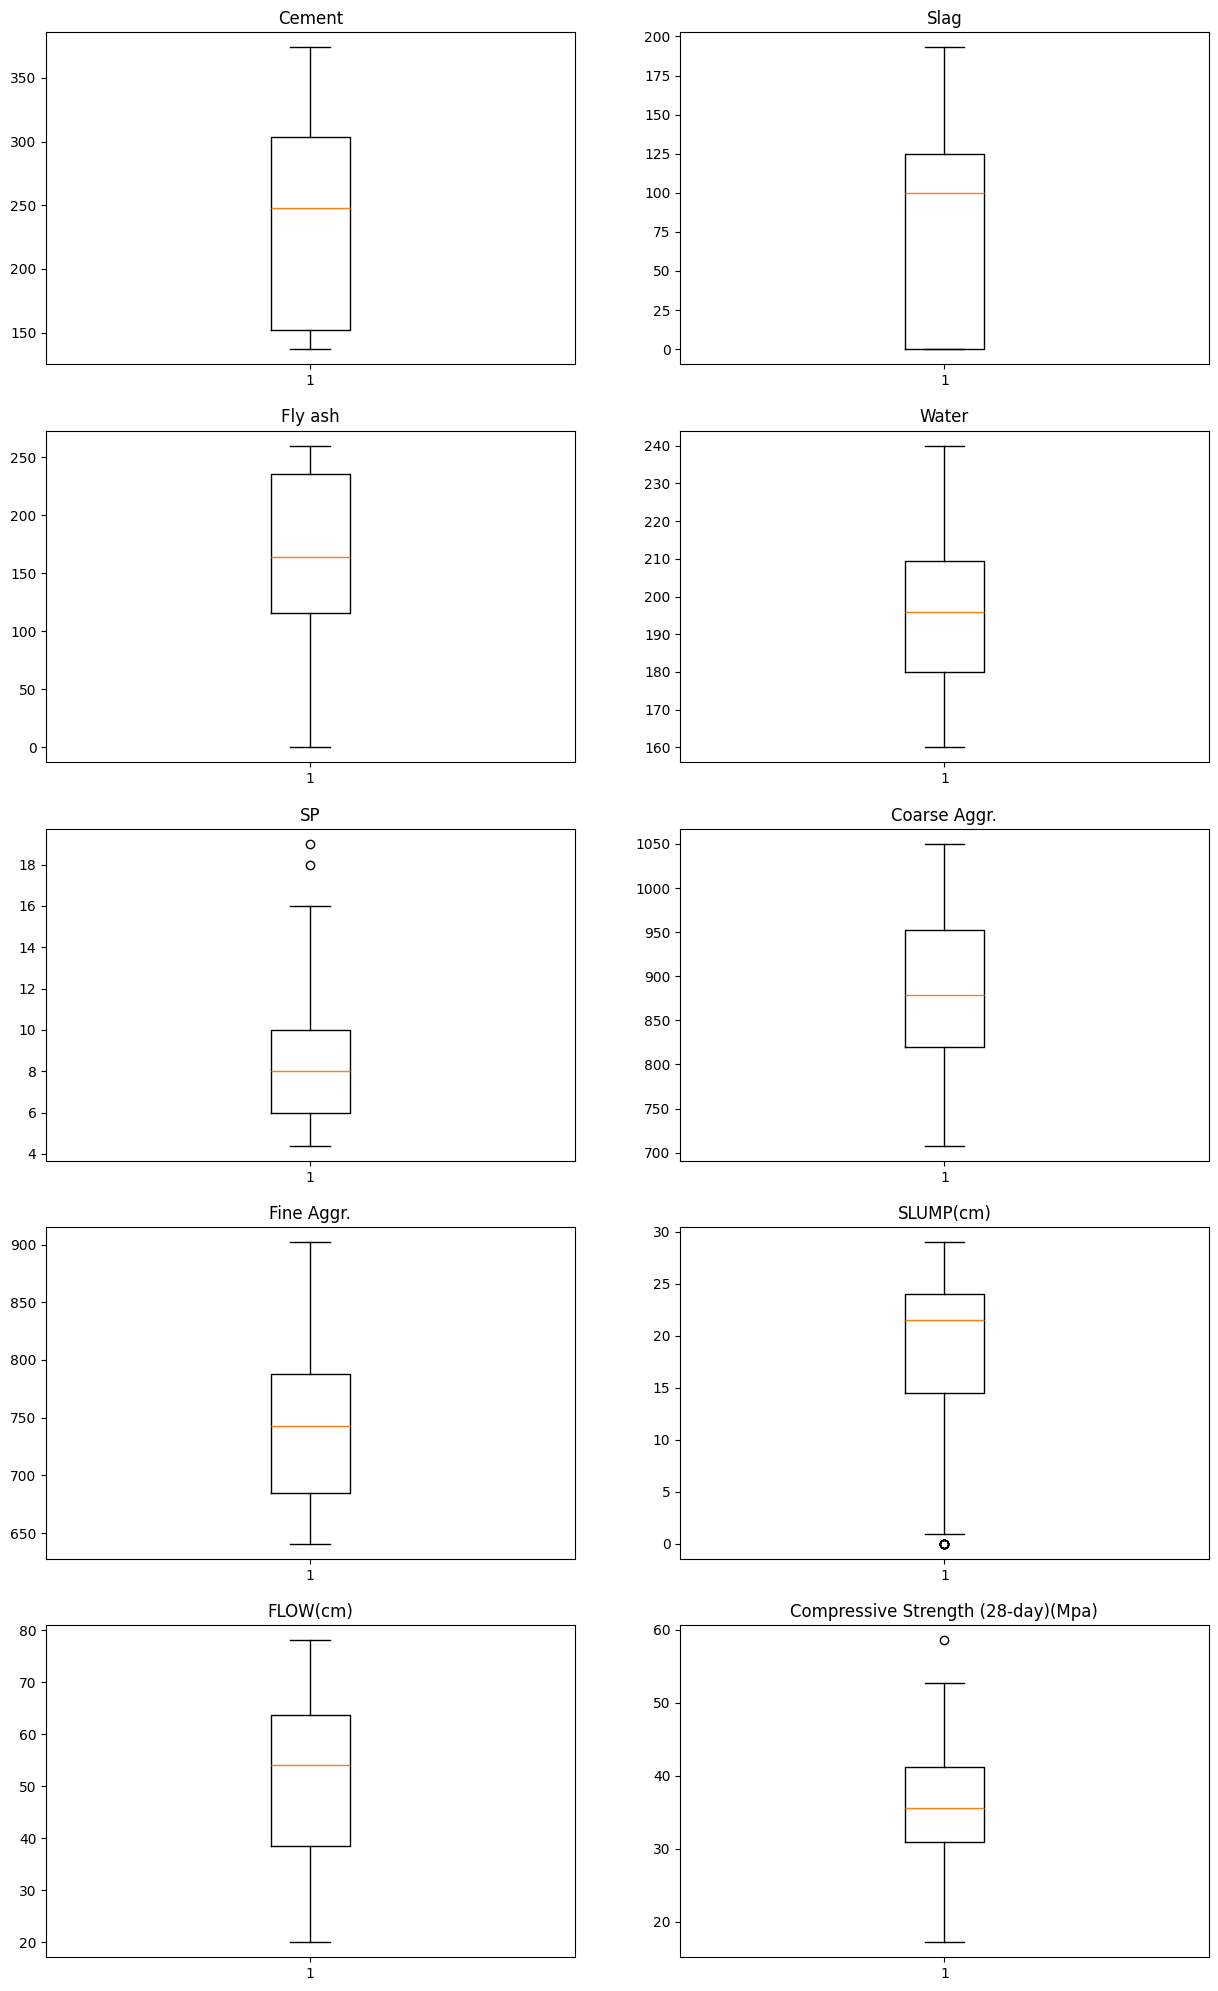

In [8]:
import matplotlib.pyplot as plt
#checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in data:
    plt.subplot(5,2,count)
    plt.boxplot(data[col])
    plt.title(col)
    count +=1
        
plt.show()

In [9]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(['Compressive Strength (28-day)(Mpa)'], axis=1) 
y = data['Compressive Strength (28-day)(Mpa)']

In [10]:
# Performing feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Making predictions on the testing data
y_pred = knn_regressor.predict(X_test)